## Support Vector Machine (SVM) is a powerful supervised machine learning algorithm widely used for classification and regression tasks. It works by finding the optimal hyperplane that separates data points of different classes in a feature space. The goal of SVM is to maximize the margin between the classes, which enhances its generalization ability.

## Key Features:
### Kernel Trick: SVM can handle non-linear data by transforming it into a higher-dimensional space using kernel functions (e.g., linear, polynomial, RBF).
### Support Vectors: These are the data points closest to the hyperplane, influencing its position and orientation.
### Robustness: Effective in high-dimensional spaces and resistant to overfitting with proper tuning.
## SVMs are commonly used in applications like image classification, bioinformatics, and text categorization.

## steps

### download imgs and transform its to normal data
### transform imgs to vectors
### load data of cats and dogs
### labeling : cats to 0 ; dogs to 1
### training model
### testing model

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# download imgs and transform its to normal data
def load_images(folder, label, img_size=(150, 150)):
    images = []
    labels = []
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img.flatten())  # transform imgs to vectors
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
cats_folder = "training_set/cats"
dogs_folder = "training_set/dogs"

In [7]:
# load data of cats and dogs
cats_data, cats_labels = load_images(cats_folder, label=0)  # 0 for cats
dogs_data, dogs_labels = load_images(dogs_folder, label=1)  # 1 for dogs

In [9]:
x = np.vstack((cats_data, dogs_data))  # concatinate imgs
y = np.hstack((cats_labels, dogs_labels))  # concatinate labels

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234)

# training SVM
svm_model = SVC(kernel='rbf', gamma='scale')  # using RBF kernel
svm_model.fit(x_train, y_train)

SVC()

In [13]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.33%


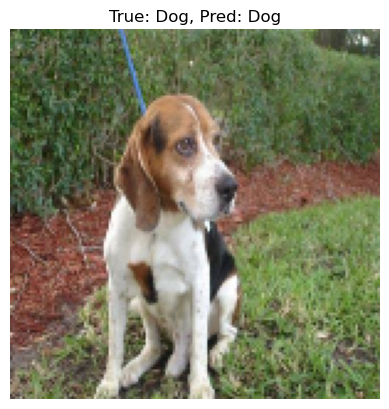

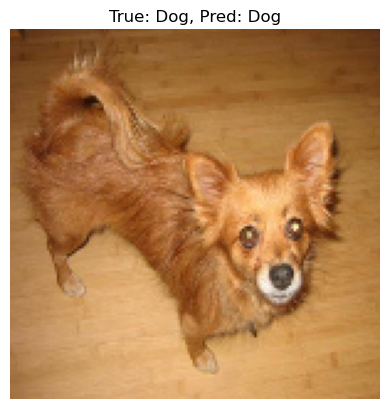

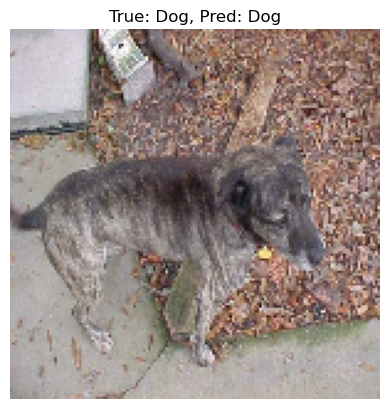

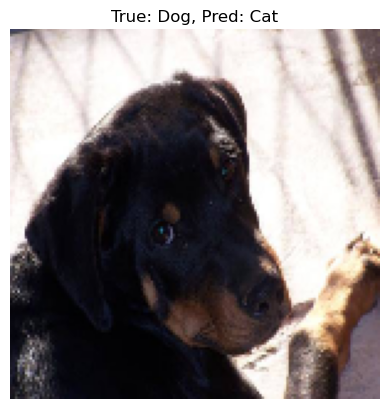

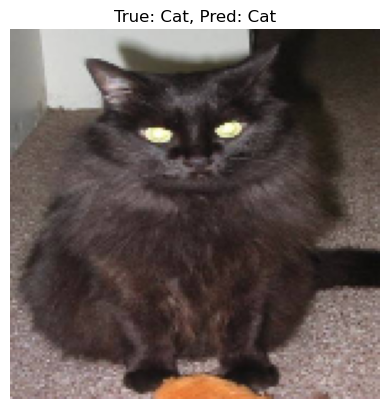

In [15]:
for i in range(5):
    img = x_test[i].reshape(150, 150, 3).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"True: {'Cat' if y_test[i] == 0 else 'Dog'}, Pred: {'Cat' if y_pred[i] == 0 else 'Dog'}")
    plt.axis('off')
    plt.show()

In [17]:
import joblib
joblib.dump(svm_model, 'svm_cat_dog_classifier.pkl')

['svm_cat_dog_classifier.pkl']

In [ ]:
svm_model = joblib.load('svm_cat_dog_classifier.pkl')